### 1.Load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('black-friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### 2.Clean the dataset

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [50]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df.duplicated()

1         False
6         False
13        False
14        False
16        False
          ...  
545902    False
545904    False
545907    False
545908    False
545914    False
Length: 166821, dtype: bool

### 3.EDA analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  object 
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.5+ MB


In [15]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


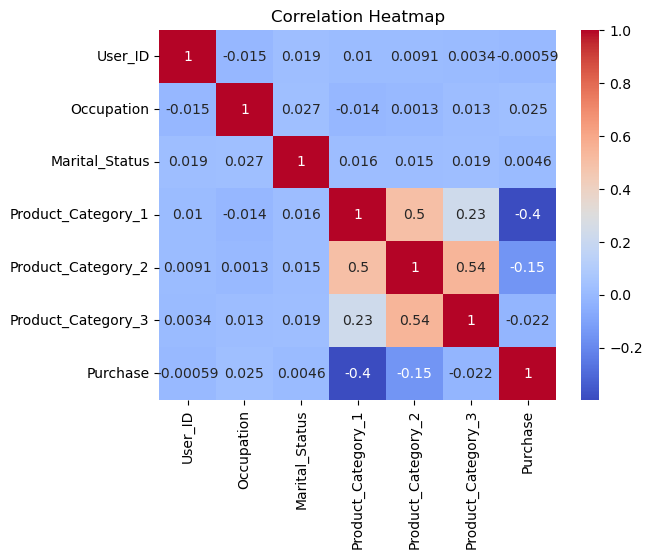

In [54]:
num_df = df.select_dtypes(include=['float64', 'int64'])
cor = num_df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


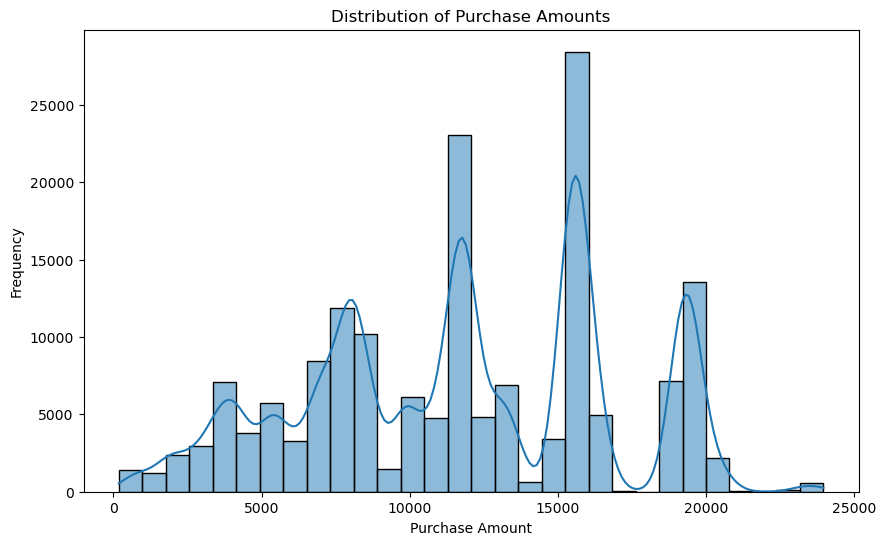

In [60]:

plt.figure(figsize=(10,6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.show()

 **using matplotlib and sns**

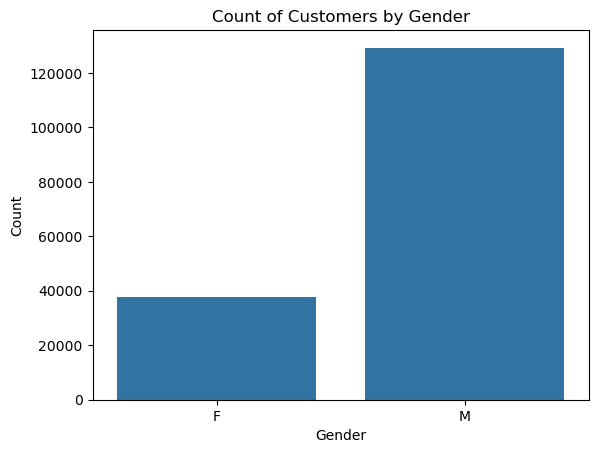

In [21]:
sns.countplot(data=df, x='Gender')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


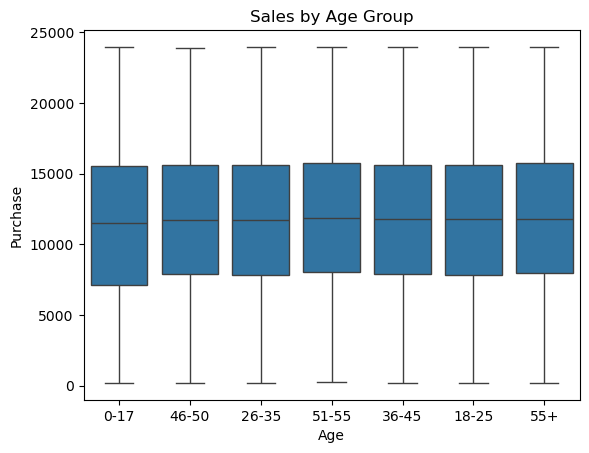

In [23]:
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Sales by Age Group')
plt.show()


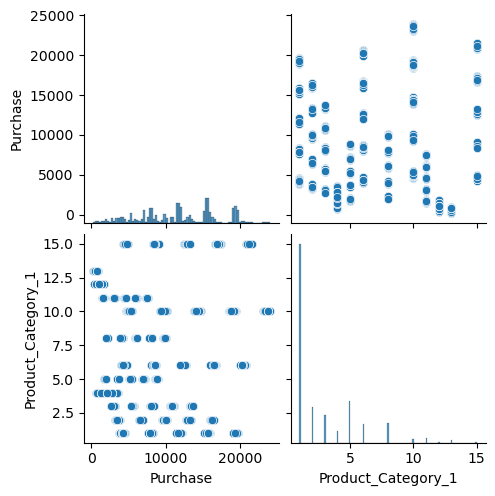

In [31]:
sns.pairplot(df[['Purchase', 'Age', 'Product_Category_1']])
plt.show()


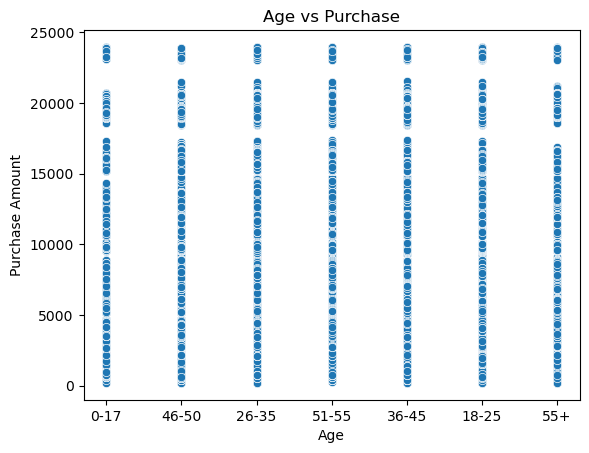

In [37]:
sns.scatterplot(x='Age', y='Purchase', data=df)
plt.title('Age vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()


 ### Explanation of Observations from the Visualizations
 ***Purchase Distribution: Most customers seem to have low purchase amounts, with a few high spenders.***
 
***Age Distribution: The age distribution might show whether younger or older customers spend more.***

***Gender vs. Purchase: We might observe differences in spending between genders.***

***City Category vs. Purchase: Some city categories might have higher or lower spending than others.***

 ### Create Feature Selection Variables

In [73]:

X = df[['Gender', 'Age', 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]

X = pd.get_dummies(X, drop_first=True)



### Select Target Variable

In [76]:

y = df['Purchase']


### Split the Data into Training and Testing

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ### Implement Models

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)



In [94]:
# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [96]:

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

Linear Regression - MAE: 3725.8090352109766 MSE: 21531863.854869466 R²: 0.17266097316779894
Decision Tree - MAE: 2742.3241777118947 MSE: 12614727.743765134 R²: 0.5152924686118361
Random Forest - MAE: 2737.0738638123767 MSE: 12562406.614968874 R²: 0.5173028524816594


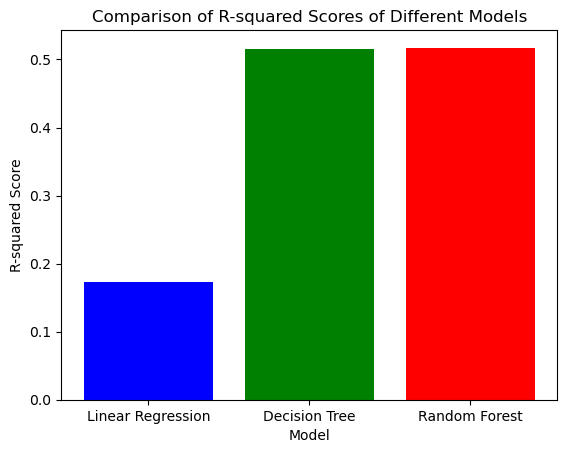

In [98]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for all models
print("Linear Regression - MAE:", mae_lr, "MSE:", mse_lr, "R²:", r2_lr)
print("Decision Tree - MAE:", mae_dt, "MSE:", mse_dt, "R²:", r2_dt)
print("Random Forest - MAE:", mae_rf, "MSE:", mse_rf, "R²:", r2_rf)

# Compare R² scores of all models using a bar chart
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_lr, r2_dt, r2_rf]

plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores of Different Models')
plt.show()